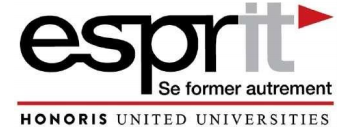



##### **UP Mathématiques - Année universitaire 2025/2026**

# **TP Programmation Linéaire : Résolution numérique & Analyse de sensibilité**

### **Objectifs du TP :**

 L’objectif général du TP est de **résoudre numériquement un problème de programmation linéaire** en utilisant Python et les solveurs intégrés
 de la bibliothèque **scipy.optimize.linprog** (HiGHS ou Simplex). Les étudiants développeront une compréhension approfondie des étapes
 nécessaires à la formulation et à la résolution de ce type de problème, tout en explorant l’analyse post-optimale et l’étude de sensibilité.

 *Objectifs spécifiques:*

 1. Introduire les étudiants aux solveurs de SciPy (par exemple HiGHS ou Simplex).
 2. Comprendre l'interprétation des résultats fournis par les solveurs, y compris les valeurs optimales des variables, le coût optimal, et les
 marges (slack).
 3. Apprendre à analyser les coefficients de dualité (prix ombrage ou shadow prices) pour étudier l'impact de changements dans les
 ressources disponibles.
 4. Étudier l'évolution de la solution optimale lorsque les coefficients de la fonction objectif ou les contraintes changent, pour développer
 une compréhension de la stabilité de la solution et des marges de faisabilité.

## **I- Problème introductif**

Une société tunisienne spécialisée dans la fabrication de produits manufacturés, fabrique deux types de produits : Produit A et Produit B. Ces produits sont réalisés à partir de trois matières premières principales : M1, M2 et M3, dont la disponibilité est limitée sur le marché local.
La production d’une unité de Produit A nécessite 10 kg de M1, 2 kg de M2 et 1 kg de M3. Le prix de vente d’une unité de Produit A est de 1200 TND. De son côté, la production d’une unité de Produit B requiert 5 kg de M1 et 3 kg de M2. Son prix de vente est de 1000 TND.

La société dispose d’un stock de 200 kg de M1, 60 kg de M2 et 34 kg de M3. Elle souhaite déterminer la quantité optimale de chaque produit à fabriquer pour maximiser son chiffre d’affaires, tout en respectant les contraintes liées aux ressources disponibles.

## **II- Modélisation**

Nous appellerons $x_1$  nombre d’unités de Produit A à fabriquer, $x_2$  nombre d’unités de Produit B à fabriquer, et $Z$ le chiffre d'affaires résultant.

Le problème est modélisé par le programme linéaire ci-dessous:

$$\max Z= 1200 x_1 +1000 x_2 $$
$$10x_1+5x_2 \leq 200$$
$$2x_1+3x_2 \leq 60 $$
$$x_1 \leq 34 $$
$$x_1 \geq 0, \, x_2\geq 0$$

## **III- Résolution numérique du PL**

Pour résoudre numériquement le PL ci-dessous, la bibliothèque **SciPy** offre une solution performante et pratique à l’aide de la fonction
 linprog. Cette fonction utilise des algorithmes modernes, comme les solveurs **"simplex"** et **"highs"**, pour minimiser une fonction objectif sous
 des contraintes d’égalité, d’inégalité et de bornes sur les variables de décision.

 Les arguments de la fonction **solve_production(c, A, b,bounds)** incluent :


*   les coefficients de la fonction objectif (c)
*   les coefficients des contraintes sous forme matricielle (A)
*   les termes constants des contraintes (b)
*   les bornes sur les variables de décision (bounds)

La maximisation est assurée en ajustant les coefficients de la fonction objectif, puisque linprog effectue par défaut une minimisation. La fonction vérifie également si une solution optimale est atteinte et retourne les valeurs optimales des variables de décision ainsi que le résultat maximal de la fonction objectif. Si aucune solution n'est trouvée, un message d'erreur informatif est levé.

###### **1) Importation des bibliothèques :**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

###### **2) Déclaration des variables A, b, c et bounds :**

In [ ]:
# Coefficients de la fonction objectif (on met en négatif pour la maximisation)
c = [-1200, -1000]

# Matrice des contraintes (A_ub * X <= b_ub)
A = [
    [10, 5],   # 10x1 + 5x2 <= 200
    [2, 3],    # 2x1 + 3x2 <= 60
    [1, 0]     # x1 <= 34
]
b = [200, 60, 34]

# non négativité des variables
bounds = [(0, None)]*len(c) #  X>= 0

###### **3) Résolution du PL :**

In [ ]:
# Résolution
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method="highs")

# Résultats
if result.success:
      # Prendre l'opposé du résultat pour la maximisation
          # Affichage des résultats
      print("Valeurs optimales des variables de décision :", result.x)
      print("Valeur maximale de la fonction objectif :", -result.fun)
else:
      raise ValueError("Le problème n'a pas de solution optimale : " + result.message)

**Interprétation:**

................................................................................................................................................................................................................................................

................................................................................................................................................................................................................................................

## **IV- Contraintes actives et réssources épuisées**:

Déterminer les matières premières épuisées si elles existent.

In [ ]:
# Slacks et contraintes actives
print("\n--- Contraintes ---")
for i, slack in enumerate(result.slack):
    print("Contrainte",i+1,": Slack=",slack,"(Active)" if slack==0 else "(Non saturée)")

**Interprétation:**

................................................................................................................................................................................................................................................

................................................................................................................................................................................................................................................



## **V- Coûts marginaux :**

Déterminer les coûts marginaux des matières premières.

In [ ]:
# Shadow prices (coûts marginaux)
print("--- Coûts marginaux (Shadow Prices) ---")
# Résolution
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method="highs")

print(result.ineqlin.marginals)

**Interprétation:**

................................................................................................................................................................................................................................................

................................................................................................................................................................................................................................................

## **VI- Etude de la sensibilité :**

### **1- Analyse de sensibilité pour le prix de vente du Produit B :**

In [ ]:
# Intervalle de prix de vente de B
prix_B = np.arange(400, 2000, 1)  # de 400 à 2000 par pas de 1

x1_opt, x2_opt = [], []

# Boucle sur les valeurs de prix_B
for pB in prix_B:
    c_new = [-1200, -pB]  # objectif à maximiser -> on met en négatif
    res = linprog(c_new, A_ub=A, b_ub=b, bounds=bounds, method="highs")
    if res.success:
        x1_opt.append(res.x[0])
        x2_opt.append(res.x[1])
    else:
        x1_opt.append(np.nan)
        x2_opt.append(np.nan)

# Tracé
plt.figure(figsize=(8,5))
plt.plot(prix_B, x1_opt,'--', label="x1 optimal", linewidth=3)
plt.plot(prix_B, x2_opt,'--', label="x2 optimal",linewidth=3)
plt.xlabel("Prix de vente du produit B")
plt.ylabel("Valeurs optimales des variables")
plt.title("Evolution des quantités X1 et X2 en fonction du prix de vente du produit B")
plt.legend()
plt.grid(True)
plt.show()

**Interprétation:**

................................................................................................................................................................................................................................................

................................................................................................................................................................................................................................................

### **2- Analyse de sensibilité sur le stock de la matière première M1 :**

In [ ]:
# Intervalle pour le stock de M1
M1_values = np.arange(10, 500, 1)  # de 10 à 500 unités

x1_opt, x2_opt, Z_opt = [], [], []

b_new=b.copy()
for M1 in M1_values:
    b_new[0] = M1  # mise à jour de la contrainte de stock M1
    res = linprog(c, A_ub=A, b_ub=b_new, bounds=bounds, method="highs")

    if res.success:
        x1_opt.append(res.x[0])
        x2_opt.append(res.x[1])
        Z_opt.append(-res.fun)
    else:
        x1_opt.append(np.nan)
        x2_opt.append(np.nan)
        Z_opt.append(np.nan)

# Tracés
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(M1_values, x1_opt,'--', label="x1 optimal", linewidth=3)
plt.plot(M1_values, x2_opt,'--', label="x2 optimal", linewidth=3)
plt.xlabel("Stock disponible de M1")
plt.ylabel("Valeurs optimales des variables")
plt.title("Evolution de X1 et X2 en fonction du stock M1")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(M1_values, Z_opt,'--', label="Profit optimal Z*", color="purple", linewidth=3)
plt.xlabel("Stock disponible de M1")
plt.ylabel("Profit optimal")
plt.title("Evolution de Z en fonction du stock M1")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Interprétation:**

................................................................................................................................................................................................................................................

................................................................................................................................................................................................................................................


## **VII- Exercice Asynchrone :**

Revenons au problème de l'agriculteur (étudié dans le cours) modélisé par le PL suivant :

$$\max Z= 100x+200 y $$
$$\text{(surface totale)}\quad x+y\leq 150 $$
$$\text{(quantité d'eau)}\quad 4x+2y\leq 440 $$
$$\text{(main d'oeuvre)}\quad x+4y\leq 480 $$
$$\text{(permission)}\quad x\leq 90 $$
$$x\geq 0, \, y\geq 0 $$

avec $x$ et $y$ représentent respectivement les surfaces à louer pour la culture de tomates et de piments.


###### **1) Résoudre le programme linéaire.**

**Interprétation:**

................................................................................................................................................................................................................................................

................................................................................................................................................................................................................................................

###### **2) De combien peut-on modifier la quantité de $m^3$ d’eau sans nuire à la solution optimale ?**

**Interprétation:**

................................................................................................................................................................................................................................................

................................................................................................................................................................................................................................................

###### **3) L'agriculteur cherche le volume horaire de main d'oeuvre suffisant pour maximiser le profit. Aider le.**

 **Interprétation:**

................................................................................................................................................................................................................................................

................................................................................................................................................................................................................................................



---



# **Références:**



1.   *Recherche opérationnelle et applications, Bernard Foltz, 2012-2013.*
2.   *Linear Programming and Duality - Indian Institute of Technology (IIT) sur NPTEL.*
3.   *Python for Optimization, par Jesús Rogel-Salazar.*

